In [123]:
import os
import sys
sys.path.append("/home/henryrpg/Desktop/N3AS/Emu_scripts/data_reduction")
import yt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import h5py
import amrex_plot_tools as amrex
import emu_yt_module as emu
import spin_flip_tools as sft
import glob
import concurrent
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,LogLocator)
from matplotlib import cm, colors
import matplotlib.axes as ax
from mpl_toolkits.mplot3d import Axes3D
import latex
from itertools import product

# For ease of development, reload the relevant modules to make sure they are up to date.
import importlib
importlib.reload(sft)

c = 299792458 #m/s
hbar =6.582119569E-16 #eV s
G=1.1663787E-23 # eV^-2 (fermi constant)

################
# plot options #
################
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'serif'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rc('text', usetex=True)
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.grid'] = False
plt.show()
def sin(theta):
    return np.sin(theta)
def cos(theta):
    return np.cos(theta)
def exp(x):
    return np.exp(x)
pi=np.pi

In [10]:
spinflip_directory = "/home/henryrpg/Desktop/N3AS/data/criticalpoint_spin_flip_matrices_0_0_.h5"
sf_file = h5py.File(spinflip_directory,'r')
sf_file.keys()

<KeysViewHDF5 ['GM(eV^3)I', 'GM(eV^3)R', 'H_LR(eV)I', 'H_LR(eV)R', 'H_L_free(eV)', 'H_L_minusplus(eV)I', 'H_L_minusplus(eV)R', 'H_Lz(eV)I', 'H_Lz(eV)R', 'H_R_free(eV)', 'H_R_plusminus(eV)I', 'H_R_plusminus(eV)R', 'H_Rz(eV)I', 'H_Rz(eV)R', 'J(eV^3)I', 'J(eV^3)R', 'J_a(eV^3)I', 'J_a(eV^3)R', 'J_p(eV^3)I', 'J_p(eV^3)R', 'S_L(eV)I', 'S_L(eV)R', 'S_L_kappa(eV)I', 'S_L_kappa(eV)R', 'S_L_minus(eV)I', 'S_L_minus(eV)R', 'S_L_plus(eV)I', 'S_L_plus(eV)R', 'S_R(eV)I', 'S_R(eV)R', 'S_R_kappa(eV)I', 'S_R_kappa(eV)R', 'S_R_minus(eV)I', 'S_R_minus(eV)R', 'S_R_plus(eV)I', 'S_R_plus(eV)R', 't(s)', 'z(cm)']>

In [114]:
J = sft.total(sf_file, 'J(eV^3)')

In [251]:
H = Hamiltonian(h5py.File(spinflip_directory,'r'),0)

In [ ]:
np.linalg.eig(H)[1]

In [243]:
for n in range(0,6):
    print(Hamiltonian(h5py.File(spinflip_directory,'r'),0)[n])

[-9.49188012e-05+0.00000000e+00j -1.95901844e-10+4.60105468e-11j
 -1.22437930e-09+3.05689894e-10j  1.70795641e-18+6.04926802e-24j
  2.53870429e-20+1.75096567e-19j  2.41791614e-19+1.09480993e-18j]
[-1.95901844e-10-4.60105468e-11j -4.74508796e-05+0.00000000e+00j
  1.52921290e-10+3.05388526e-12j  3.27978338e-20-1.75099754e-19j
  8.22454742e-19+4.45510304e-24j  3.28639178e-21+6.44644898e-23j]
[-1.22437930e-09-3.05689894e-10j  1.52921290e-10-3.05388526e-12j
 -4.74498048e-05+0.00000000e+00j  2.37186856e-19-1.09480379e-18j
  3.41340700e-21-4.07559525e-23j  8.45306562e-19-3.74455686e-23j]
[ 1.70795641e-18-6.04926802e-24j  3.27978338e-20+1.75099754e-19j
  2.37186856e-19+1.09480379e-18j  9.49587788e-05+0.00000000e+00j
 -1.95148665e-10+4.60105468e-11j -1.22426912e-09+3.05689894e-10j]
[ 2.53870429e-20-1.75096567e-19j  8.22454742e-19-4.45510304e-24j
  3.41340700e-21+4.07559525e-23j -1.95148665e-10-4.60105468e-11j
  4.74879104e-05+0.00000000e+00j  1.52921290e-10+3.05388526e-12j]
[ 2.41791614e-19-1.0

In [245]:
H_LR[0]

array([[1.70795641e-18+6.04926802e-24j, 2.53870429e-20+1.75096567e-19j,
        2.41791614e-19+1.09480993e-18j],
       [3.27978338e-20-1.75099754e-19j, 8.22454742e-19+4.45510304e-24j,
        3.28639178e-21+6.44644898e-23j],
       [2.37186856e-19-1.09480379e-18j, 3.41340700e-21-4.07559525e-23j,
        8.45306562e-19-3.74455686e-23j]])

In [240]:
sf_file = h5py.File(spinflip_directory,'r')

H_L = np.average(sft.total(sf_file, 'H_Lz(eV)'),axis=3)

H_R = np.average(sft.total(sf_file, 'H_Rz(eV)'), axis = 3)

H_LR = np.average(sft.total(sf_file, 'H_LR(eV)'), axis = 3)
    

In [387]:
def Hamiltonian(sf_file,t):
    H_L = sft.total(sf_file, 'H_Lz(eV)')

    H_R = sft.total(sf_file, 'H_Rz(eV)')

    H_LR = sft.total(sf_file, 'H_LR(eV)')

    return np.average(np.concatenate((np.concatenate( (H_R, np.conjugate(H_LR.transpose(0,2,1,3))), axis=1),
                    np.concatenate((H_LR, H_L), axis = 1)), axis = 2), axis= 3)[t,:,:]


class Diagonalizer:
    def __init__(self, filepath, t=0):
        
        self.sf_file = h5py.File(filepath,'r')
            
        #get Hamiltonian
        
        self.H = Hamiltonian(self.sf_file, t)
        self.Hsize = self.H.shape[1]
       
        #list of eigenvalues 
        self.eigenvals = (1+0*1j)*np.real(np.linalg.eig(self.H)[0] )

        #(inverted) array of normalized eigenvectors
        #a.k.a. change of basis matrix from Energy to flavor/spin
        #ket_f = f_to_e(ket_e)
        #H_f = (f_to_e) H_diag (e_to f)^-1
        self.f_to_e = (1+0*1j)*np.linalg.inv(np.linalg.eig(self.H)[1]) 
        
        self.H_diag = self.f_to_e @ self.H @ np.linalg.inv(self.f_to_e)
    #Time evolution operator in energy basis
    def U_energy(self, t):
        return np.diag([exp(-1j*eigenvalue*t) for eigenvalue in self.eigenvals])
   
    def U_flavor(self, t):
        return self.f_to_e @ self.U_energy(t) @ np.linalg.inv(self.f_to_e)
    
    #time array of neutrino density matrix, with init_array as intial condition
    def state_evolution(self, resolution, t_lim, init_array = np.diag((1,1,1,1,1,1))):
        return np.array([self.U_flavor(t) @ init_array @ np.linalg.inv(self.U_flavor(t)) for t in np.linspace(0, t_lim, resolution)])
    
    def state_evolution_plotter(self, resolution, t_lim, init_array = np.diag((1,1,1,1,1,1))):
        flavornum = self.Hsize//2
        left_minus_right = np.trace(self.state_evolution(
            resolution, t_lim, init_array)[:,0:flavornum,0:flavornum], axis1=2, axis2 =1
                                   ) - np.trace(self.state_evolution(resolution, t_lim, init_array)[:,flavornum:2*flavornum,flavornum:2*flavornum], axis1=1, axis2 =2)
        print(np.min(left_minus_right))
        print(np.max(left_minus_right))

        f, ax = plt.subplots()
        ax.set_ylabel('right trace minus left trace')
        ax.set_xlabel('s')
        ax.plot(np.linspace(0,t_lim,resolution), left_minus_right)

(0.9999999999999997+1.573470361031295e-17j)
(1.0000000000000004+2.9374154993648938e-18j)


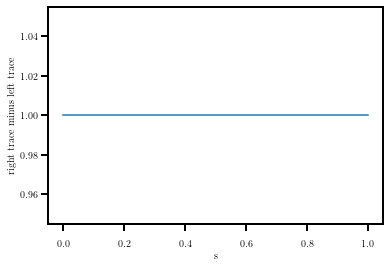

In [388]:
Diagonalizer(spinflip_directory, 100).state_evolution_plotter(1000,1, init_array = np.diag((1,1,1,0,0,0)))

In [466]:
def Hamiltonian(sf_file,t):
    H_L = sft.total(sf_file, 'H_Lz(eV)')

    H_R = sft.total(sf_file, 'H_Rz(eV)')
    H_LR = sft.total(sf_file, 'H_LR(eV)')

    return np.average(np.concatenate((np.concatenate( (H_R, np.conjugate(H_LR.transpose(0,2,1,3))), axis=1),
                    np.concatenate((H_LR, H_L), axis = 1)), axis = 2), axis= 3)[t,:,:]


class Diagonalizer_debug:
    def __init__(self, filepath, t=0, H = None):
        
        self.sf_file = h5py.File(filepath,'r')
            
        #get Hamiltonian
        if H is None:
            self.H = Hamiltonian(self.sf_file, t)
        else: 
            self.H = H
        self.Hsize = self.H.shape[1]
        #list of eigenvalues 
        self.eigenvals = (1+0*1j)*np.real(np.linalg.eig(self.H)[0] )

        #(inverted) array of normalized eigenvectors
        #a.k.a. change of basis matrix from Energy to flavor/spin
        #ket_f = f_to_e(ket_e)
        #H_f = (f_to_e) H_diag (e_to f)^-1
        self.f_to_e = (1+0*1j)*np.linalg.inv(np.linalg.eig(self.H)[1]) 
        
        self.H_diag = self.f_to_e @ self.H @ np.linalg.inv(self.f_to_e)
    #Time evolution operator in energy basis
    def U_energy(self, t):
        return np.diag([exp(-1j*eigenvalue*t) for eigenvalue in self.eigenvals])
   
    def U_flavor(self, t):
        return self.f_to_e @ self.U_energy(t) @ np.linalg.inv(self.f_to_e)
   
    #time array of neutrino density matrix, with init_array as intial condition
    def state_evolution(self, resolution, t_lim, init_array):
        return np.array([self.U_flavor(t) @ init_array @ np.linalg.inv(self.U_flavor(t)) for t in np.linspace(0, t_lim, resolution)])
    
    def state_evolution_plotter(self, resolution, t_lim, init_array = np.diag((1,0,0,0,0,0))):
        flavornum = self.Hsize//2
        state_vs_time = self.state_evolution(resolution, t_lim, init_array)
        state_left = np.trace(state_vs_time[:,0:flavornum,0:flavornum], axis1= 1, axis2 = 2)
        state_right = np.trace(state_vs_time[:,flavornum:2*flavornum,flavornum:2*flavornum], axis1= 1, axis2 = 2)
        left_minus_right = state_left - state_right
        
        #electron_part = self.state_evolution(resolution, t_lim, init_array)[:,0,0]
        f, ax = plt.subplots()
        ax.set_ylabel('right trace minus left trace')
        ax.set_xlabel('s')
        ax.set_ylim(0,2E-15)
        qty = np.real(state_vs_time[:,3,3])
        ax.plot(np.linspace(0,t_lim,resolution),qty)
        print(np.min(qty))
        print(np.max(qty))

1.4374712299762738e-56
1.1434596929023293e-23
0.0
0.0


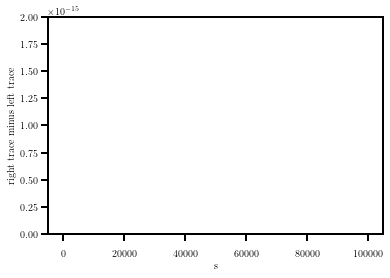

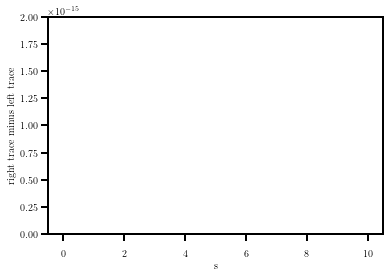

In [467]:
Htest= np.zeros((6,6))
Htest[3,0]=1
Htest[0,3]=1
Diagonalizer_debug(spinflip_directory, 100).state_evolution_plotter(1000,10000E1, init_array = np.diag((1,0,0,0,0,0)))
Diagonalizer_debug(spinflip_directory, 100, H= Htest).state_evolution_plotter(1000,1E1, init_array = np.diag((1,2,0,0,0,0)))
#Diagonalizer_debug(spinflip_directory, 100, H= np.array([[0,1],[1,0]])).state_evolution_plotter(1000,1E1, init_array = np.diag((1,0)))


In [431]:
Htest

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [398]:
evals = (np.linalg.eigvals(Diagonalizer_debug(spinflip_directory, 0).H_diag))
min_eval_difference = 1e100
for i in range(len(evals)):
    for j in range(i+1,len(evals)):
        diff = np.abs(evals[i]-evals[j])
        if diff>0: min_eval_difference = min(diff,min_eval_difference)
print(min_eval_difference)
max_timescale = hbar/min_eval_difference
print(max_timescale)

1.1174654358992635e-09
5.890222066424039e-07


/home/henryrpg/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


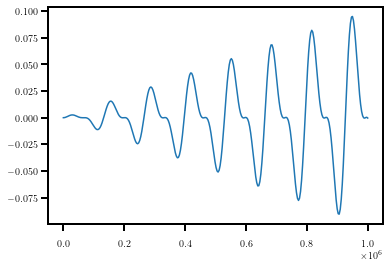

In [175]:
t_sim = 10
resolution = 300
timescale =0.1*1E-7**-1
state_evolution = np.array([(U(t, t_sim) @ np.diag((1,1,1,1,1,1))) for t in np.linspace(0, timescale, resolution)])
 
left_minus_right = np.trace(state_evolution[:,0:3,0:3], axis1=2, axis2 =1) - np.trace(state_evolution[:,3:6,3:6], axis1=2, axis2 =1)


plt.plot(np.linspace(0,timescale,resolution), left_minus_right)
                                          
                                          

In [125]:
np.shape(state_evolution)

(30, 6, 6)

In [146]:
Diagonalizer(spinflip_directory, t_sim).eigenvals

array([-9.49188012e-05+0.j, -4.74497834e-05+0.j, -4.74509009e-05+0.j,
        9.49587788e-05+0.j,  4.74890065e-05+0.j,  4.74878890e-05+0.j])